# 1 神经网络

### 1.1 神经网络结构
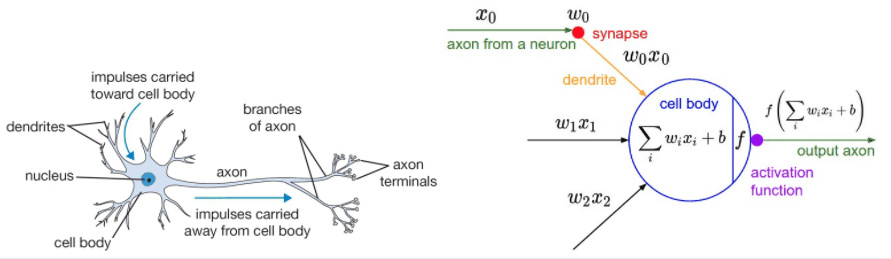

左边是一张神经元的图片，神经元通过突触接受输入，然后通过神经激活的方式传输给后面的神经元。这对比于右边的神经网络，首先接受数据输入，然后通过计算得到结果，接着经过激活函数，再传给第二层的神经元。

## 1.2 激活函数
- 神经网络使用的激活函数都是非线性的，每个激活函数都输入一个值，然后做一种特定的数学运算得到一个结果

### 1.2.1 sigmoid 激活函数

$$\sigma(x) = \frac{1}{1 + e^{-x}}$$
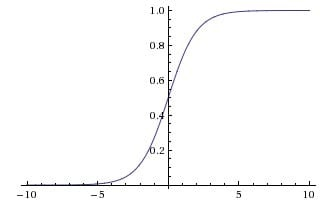

### 1.2.2 tanh 激活函数
$$tanh(x) = 2 \sigma(2x) - 1$$
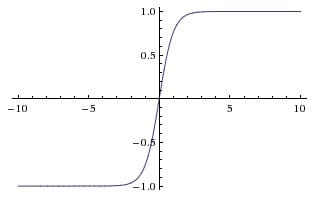

### 1.2.3 ReLU 激活函数

$$ReLU(x) = max(0, x)$$
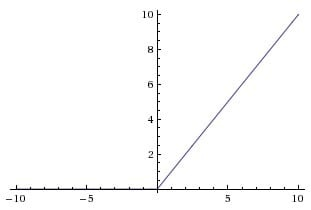

### 1.2.4 为什么要使用非线性激活函数
激活函数在神经网络中非常重要，使用激活函数也是非常必要的，前面我们从人脑神经元的角度理解了激活函数，因为神经元需要通过激活才能往后传播，所以神经网络中需要激活函数，下面我们从数学的角度理解一下激活函数的必要性。

比如一个两层的神经网络，使用 A 表示激活函数，那么

$$
y = w_2 A(w_1 x)
$$

如果我们不使用激活函数，那么神经网络的结果就是

$$
y = w_2 (w_1 x) = (w_2 w_1) x = \bar{w} x
$$

可以看到，我们将两层神经网络的参数合在一起，用 $\bar{w}$ 来表示，两层的神经网络其实就变成了一层神经网络，只不过参数变成了新的 $\bar{w}$，所以如果不使用激活函数，那么不管多少层的神经网络，$y = w_n \cdots w_2 w_1 x = \bar{w} x$，就都变成了单层神经网络，所以在每一层我们都必须使用激活函数。

## 1.3 神经网络的结构
神经网络的结构
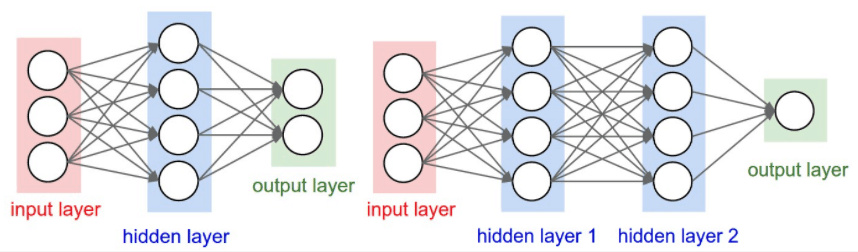

神经网络向前传播，就是一层一层不断做运算

# 2 Sequential构建网络
Sequential 允许我们构建序列化的模块

In [3]:
from torch import nn
# Sequential
seq_net = nn.Sequential(
    nn.Linear(2, 4), # PyTorch中的线性层，wx + b
    nn.Tanh(),
    nn.Linear(4, 1)
)

In [4]:
# 序列模块可以通过索引访问每一层
seq_net[0] # 第一层
seq_net

Sequential(
  (0): Linear(in_features=2, out_features=4, bias=True)
  (1): Tanh()
  (2): Linear(in_features=4, out_features=1, bias=True)
)

In [5]:
# 打印出第一层的权重
w0 = seq_net[0].weight
print(w0)

Parameter containing:
tensor([[ 0.6631,  0.5622],
        [ 0.0680, -0.0861],
        [-0.6082,  0.4055],
        [-0.6447, -0.0771]], requires_grad=True)


In [6]:
# 通过 parameters 可以取得模型的参数
param = seq_net.parameters()
print(list(seq_net.parameters()))

[Parameter containing:
tensor([[ 0.6631,  0.5622],
        [ 0.0680, -0.0861],
        [-0.6082,  0.4055],
        [-0.6447, -0.0771]], requires_grad=True), Parameter containing:
tensor([ 0.5660,  0.1458, -0.0603, -0.3624], requires_grad=True), Parameter containing:
tensor([[-0.4003,  0.4247,  0.4845,  0.1955]], requires_grad=True), Parameter containing:
tensor([-0.3406], requires_grad=True)]


# 4. 用Module构建网络

In [7]:
class module_net(nn.Module):
    def __init__(self, num_input, num_hidden, num_output):
        super(module_net, self).__init__()
        self.layer1 = nn.Linear(num_input, num_hidden)
        
        self.layer2 = nn.Tanh()
        
        self.layer3 = nn.Linear(num_hidden, num_output)
        
    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        return x

In [8]:
mo_net = module_net(2, 4, 1)
# 访问模型中的某层可以直接通过名字
l1 = mo_net.layer1
print(l1)

Linear(in_features=2, out_features=4, bias=True)


In [9]:
# 打印出第一层的权重
print(l1.weight)

Parameter containing:
tensor([[-0.3136, -0.5543],
        [ 0.2122, -0.5527],
        [-0.6820,  0.1902],
        [ 0.1839, -0.1102]], requires_grad=True)
